In [1]:
#Dependancy 
import pandas as pd

In [2]:
deathsURL="https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv"
deathsCases = pd.read_csv(deathsURL)

In [49]:
totalDeathPerDay = deathsCases[deathsCases['Country/Region'].isin(['China', 'Italy','US'])].drop(['Province/State', 'Lat', 'Long'], axis=1)
totalDeathPerDay = totalDeathPerDay.groupby('Country/Region').sum()
totalDeathPerDay = totalDeathPerDay.T
totalDeathPerDay.tail()

Country/Region,China,Italy,US
4/13/20,3345,20465,23528
4/14/20,3345,21067,25831
4/15/20,3346,21645,28325
4/16/20,3346,22170,32916
4/17/20,4636,22745,36773


In [4]:
totalDeathPerDay.describe()

Country/Region,China,Italy,US
count,87.000000,87.000000,87.000000
mean,2342.655172,4890.057471,3644.965517
std,1234.440772,7297.117563,8090.212957
min,17.000000,0.000000,0.000000
25%,1243.000000,0.000000,0.000000
50%,3015.000000,148.000000,12.000000
75%,3293.500000,8674.500000,1395.000000
max,4636.000000,22745.000000,36773.000000


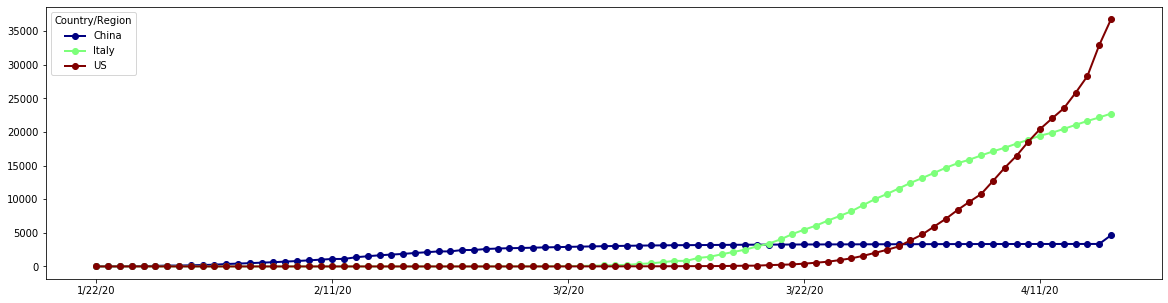

In [5]:
totalDeathPerDay.plot(lw=2, colormap='jet', marker='.', markersize=12, figsize=(20,5))

In [50]:
newDeathPerDay = totalDeathPerDay.diff()
newDeathPerDay.tail()

Country/Region,China,Italy,US
4/13/20,2.0,566.0,1509.0
4/14/20,0.0,602.0,2303.0
4/15/20,1.0,578.0,2494.0
4/16/20,0.0,525.0,4591.0
4/17/20,1290.0,575.0,3857.0


In [7]:
totalDeathPerDay.describe()

Country/Region,China,Italy,US
count,87.000000,87.000000,87.000000
mean,2342.655172,4890.057471,3644.965517
std,1234.440772,7297.117563,8090.212957
min,17.000000,0.000000,0.000000
25%,1243.000000,0.000000,0.000000
50%,3015.000000,148.000000,12.000000
75%,3293.500000,8674.500000,1395.000000
max,4636.000000,22745.000000,36773.000000


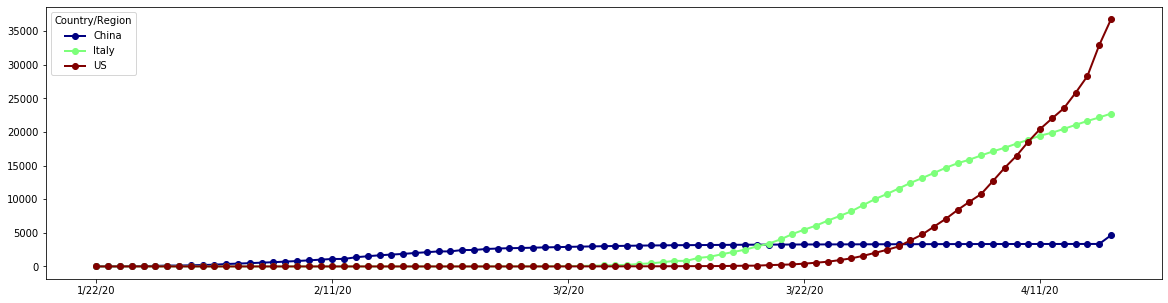

In [8]:
totalDeathPerDay.plot(lw=2, colormap='jet', marker='.', markersize=12, figsize=(20,5))

In [17]:
import import_ipynb
import recovered_cases
recovered_cases.newCasesVsRecoveredPerDay

Country/Region,China_confirmid,Italy_confirmid,US_confirmid,China_Recovered,Italy_Recovered,US_Recovered
1/22/20,NaN,NaN,NaN,NaN,NaN,NaN
1/23/20,95.0,0.0,0.0,2.0,0.0,0.0
1/24/20,277.0,0.0,1.0,6.0,0.0,0.0
1/25/20,486.0,0.0,0.0,3.0,0.0,0.0
1/26/20,669.0,0.0,3.0,10.0,0.0,0.0
...,...,...,...,...,...,...
4/13/20,79.0,3153.0,25306.0,83.0,1224.0,10494.0
4/14/20,93.0,2972.0,27051.0,161.0,1695.0,4281.0
4/15/20,50.0,2667.0,28680.0,111.0,962.0,4333.0
4/16/20,47.0,3786.0,31451.0,90.0,2072.0,2607.0


In [14]:
newCasesVsRecoveredAndDeathPerDay = pd.merge(
    recovered_cases.newCasesVsRecoveredPerDay, 
    newDeathPerDay, 
    left_index=True, 
    right_index=True, 
    how='outer'
)
newCasesVsRecoveredAndDeathPerDay = newCasesVsRecoveredAndDeathPerDay.rename(columns={
    'China': 'China_death',
    'Italy': 'Italy_death',
    'US': 'US_death',
})
newCasesVsRecoveredAndDeathPerDay

Country/Region,China_confirmid,Italy_confirmid,US_confirmid,China_Recovered,Italy_Recovered,US_Recovered,China_death,Italy_death,US_death
1/22/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/23/20,95.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0
1/24/20,277.0,0.0,1.0,6.0,0.0,0.0,8.0,0.0,0.0
1/25/20,486.0,0.0,0.0,3.0,0.0,0.0,16.0,0.0,0.0
1/26/20,669.0,0.0,3.0,10.0,0.0,0.0,14.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
4/13/20,79.0,3153.0,25306.0,83.0,1224.0,10494.0,2.0,566.0,1509.0
4/14/20,93.0,2972.0,27051.0,161.0,1695.0,4281.0,0.0,602.0,2303.0
4/15/20,50.0,2667.0,28680.0,111.0,962.0,4333.0,1.0,578.0,2494.0
4/16/20,47.0,3786.0,31451.0,90.0,2072.0,2607.0,0.0,525.0,4591.0


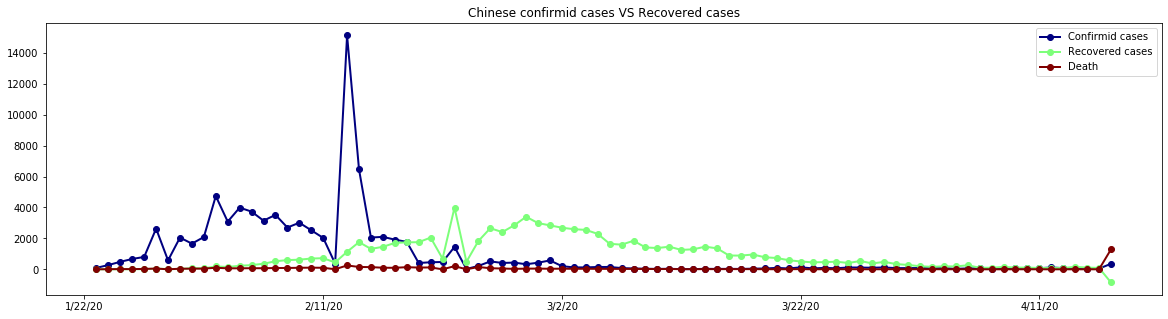

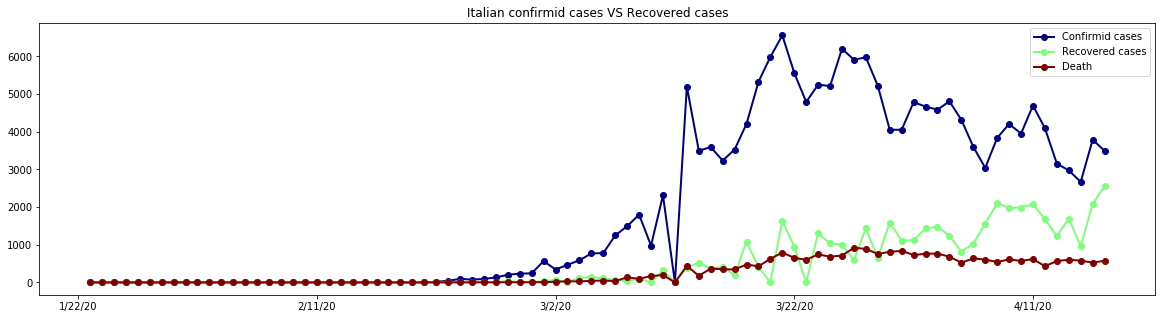

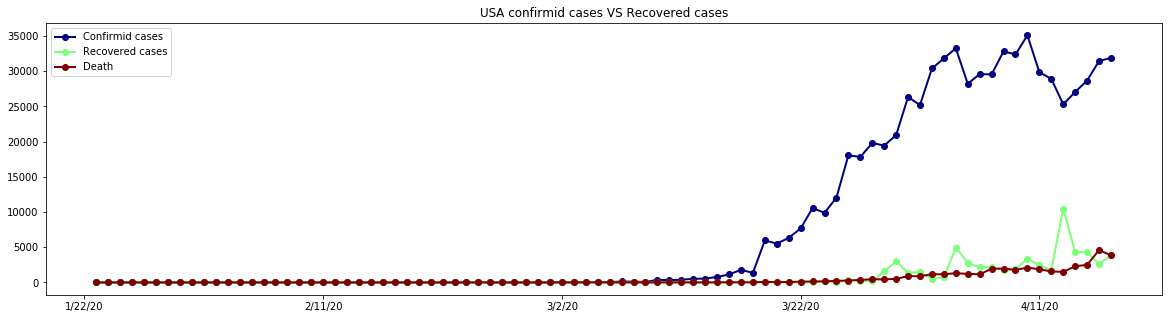

In [16]:
newCasesVsRecoveredAndDeathPerDay.plot(
    title='Chinese confirmid cases VS Recovered cases VS Death', 
    lw=2, 
    colormap='jet', 
    marker='.',
    markersize=12, 
    figsize=(20,5), 
    y=['China_confirmid', 'China_Recovered', 'China_death']).legend(["Confirmid cases", "Recovered cases", "Death"])

newCasesVsRecoveredAndDeathPerDay.plot(
    title='Italian confirmid cases VS Recovered cases VS Death', 
    lw=2, colormap='jet', 
    marker='.', 
    markersize=12, 
    figsize=(20,5), 
    y=['Italy_confirmid', 'Italy_Recovered', 'Italy_death']).legend(["Confirmid cases", "Recovered cases", "Death"])

newCasesVsRecoveredAndDeathPerDay.plot(
    title='USA confirmid cases VS Recovered cases VS Death', 
    lw=2, 
    colormap='jet', 
    marker='.', 
    markersize=12, 
    figsize=(20,5), 
    y=['US_confirmid', 'US_Recovered', 'US_death']).legend(["Confirmid cases", "Recovered cases", "Death"])

In [30]:
totalCasesVsRecoveredAndDeathPerDay = pd.merge(
    recovered_cases.totalCasesVsRecoveredPerDay, 
    totalDeathPerDay, 
    left_index=True, 
    right_index=True, 
    how='outer'
)
totalCasesVsRecoveredAndDeathPerDay = totalCasesVsRecoveredAndDeathPerDay.rename(columns={
    'China': 'China_death',
    'Italy': 'Italy_death',
    'US': 'US_death',
})
totalCasesVsRecoveredAndDeathPerDay

Country/Region,China_confirmid,Italy_confirmid,US_confirmid,China_Recovered,Italy_Recovered,US_Recovered,China_death,Italy_death,US_death
1/22/20,548,0,1,28,0,0,17,0,0
1/23/20,643,0,1,30,0,0,18,0,0
1/24/20,920,0,2,36,0,0,26,0,0
1/25/20,1406,0,2,39,0,0,42,0,0
1/26/20,2075,0,5,49,0,0,56,0,0
...,...,...,...,...,...,...,...,...,...
4/13/20,83213,159516,580619,78039,35435,43482,3345,20465,23528
4/14/20,83306,162488,607670,78200,37130,47763,3345,21067,25831
4/15/20,83356,165155,636350,78311,38092,52096,3346,21645,28325
4/16/20,83403,168941,667801,78401,40164,54703,3346,22170,32916


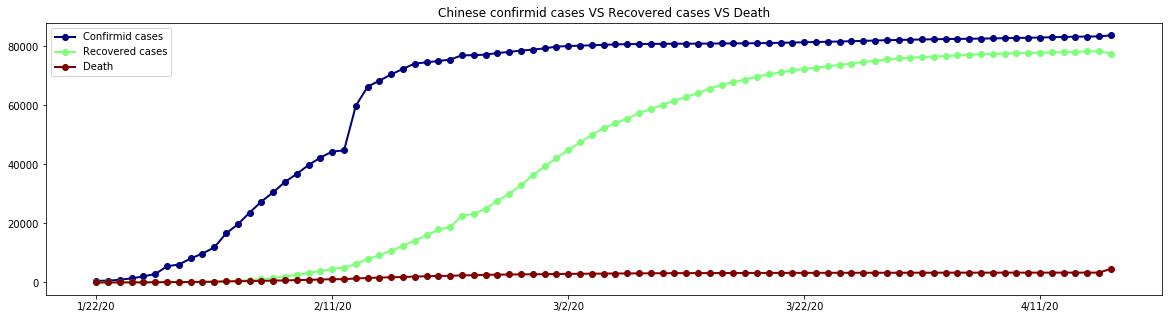

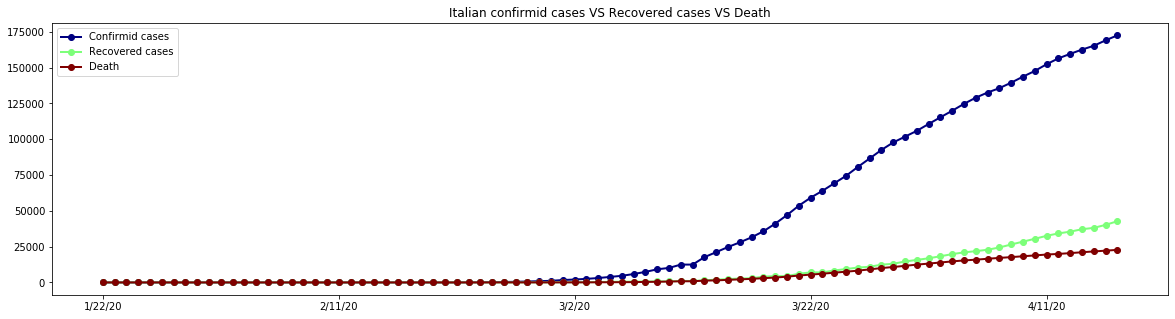

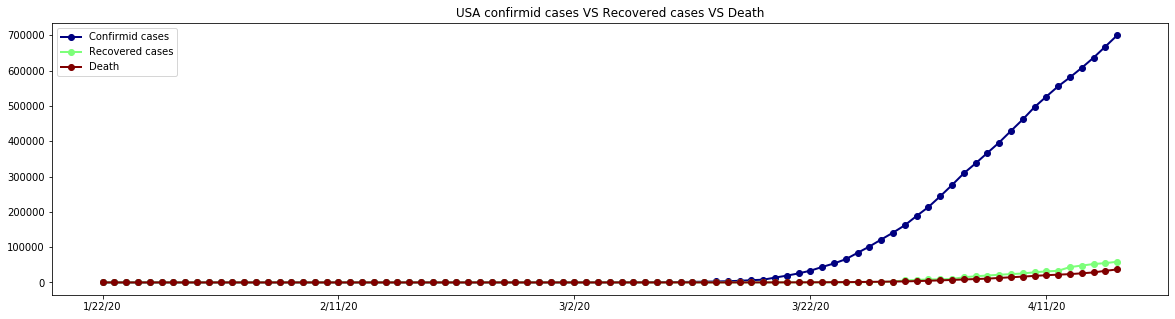

In [31]:
totalCasesVsRecoveredAndDeathPerDay.plot(
    title='Chinese confirmid cases VS Recovered cases VS Death', 
    lw=2, 
    colormap='jet', 
    marker='.',
    markersize=12, 
    figsize=(20,5), 
    y=['China_confirmid', 'China_Recovered', 'China_death']).legend(["Confirmid cases", "Recovered cases", "Death"])

totalCasesVsRecoveredAndDeathPerDay.plot(
    title='Italian confirmid cases VS Recovered cases VS Death', 
    lw=2, colormap='jet', 
    marker='.', 
    markersize=12, 
    figsize=(20,5), 
    y=['Italy_confirmid', 'Italy_Recovered', 'Italy_death']).legend(["Confirmid cases", "Recovered cases", "Death"])

totalCasesVsRecoveredAndDeathPerDay.plot(
    title='USA confirmid cases VS Recovered cases VS Death', 
    lw=2, 
    colormap='jet', 
    marker='.', 
    markersize=12, 
    figsize=(20,5), 
    y=['US_confirmid', 'US_Recovered', 'US_death']).legend(["Confirmid cases", "Recovered cases", "Death"])

In [51]:
TotalCovid19Cases = totalCasesVsRecoveredAndDeathPerDay.assign(
    China_active = totalCasesVsRecoveredAndDeathPerDay['China_confirmid'] - 
    (totalCasesVsRecoveredAndDeathPerDay['China_Recovered'] + totalCasesVsRecoveredAndDeathPerDay['China_death']),
    Italy_active = totalCasesVsRecoveredAndDeathPerDay['Italy_confirmid'] - 
    (totalCasesVsRecoveredAndDeathPerDay['Italy_Recovered'] + totalCasesVsRecoveredAndDeathPerDay['Italy_death']),
    US_active = totalCasesVsRecoveredAndDeathPerDay['US_confirmid'] - 
    (totalCasesVsRecoveredAndDeathPerDay['US_Recovered'] + totalCasesVsRecoveredAndDeathPerDay['US_death'])
)
TotalCovid19Cases.tail()

Country/Region,China_confirmid,Italy_confirmid,US_confirmid,China_Recovered,Italy_Recovered,US_Recovered,China_death,Italy_death,US_death,China_active,Italy_active,US_active
4/13/20,83213,159516,580619,78039,35435,43482,3345,20465,23528,1829,103616,513609
4/14/20,83306,162488,607670,78200,37130,47763,3345,21067,25831,1761,104291,534076
4/15/20,83356,165155,636350,78311,38092,52096,3346,21645,28325,1699,105418,555929
4/16/20,83403,168941,667801,78401,40164,54703,3346,22170,32916,1656,106607,580182
4/17/20,83760,172434,699706,77552,42727,58545,4636,22745,36773,1572,106962,604388


In [58]:
TotalCovid19Cases.describe()

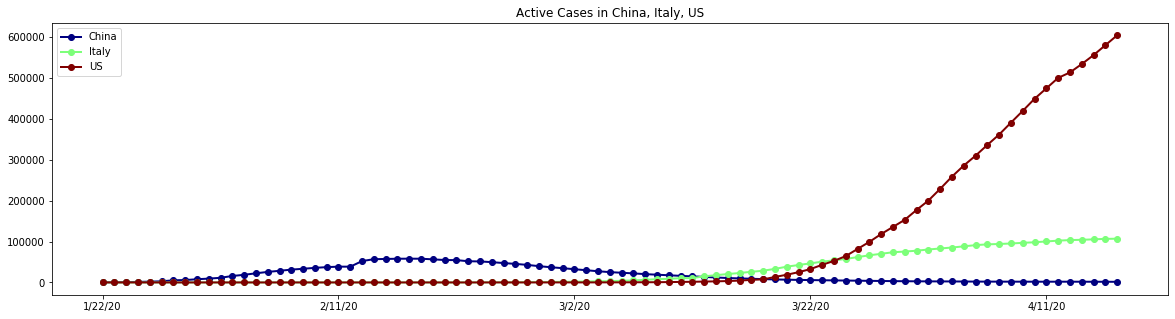

In [40]:
TotalCovid19Cases.plot(title='Active Cases in China, Italy, US', 
    lw=2, 
    colormap='jet', 
    marker='.', 
    markersize=12, 
    figsize=(20,5),
    y=['China_active', 'Italy_active', 'US_active']).legend(["China", "Italy", "US"])